# EDA

The code template shall perform the following steps:
1. Preview data
2. Check total number of entries and column types
3. Check any null values
4. Check duplicate entries
5. Plot distribution of numeric data (univariate and pairwise joint distribution)
6. Analyse time series of numeric data by daily, monthly and yearly frequencies

 https://towardsdatascience.com/exploratory-data-analysis-eda-a-practical-guide-and-template-for-structured-data-abfbf3ee3bd9
 

Exploratory Data Analysis does two main things:
1. It helps clean up a dataset.
2. It gives you a better understanding of the variables and the relationships between them.

# Import necessary libraries

In [1]:
# Some libraries may have compatibility issues if your Python predates v3.8
!which python; python -V;

/Users/abrarrahman/miniconda3/bin/python
Python 3.8.3


In [2]:
"""
TODO: ensure all libraries are installed for the correct python version
"""

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import missingno
import glob, os
warnings.simplefilter('ignore')
matplotlib.rcParams['figure.dpi'] = 100
sns.set()
%matplotlib inline

In [3]:
# Print working directory
%pwd

'/Users/abrarrahman/Downloads/EDA_EMIS'

# Read in files and concatenate them all with filename in column

In [4]:
"""
TODO: - set curr_dir = pwd from the above cell
      - make sure to NOT include final backslash 
"""
curr_dir = "/Users/abrarrahman/Downloads"
files = glob.glob(curr_dir + '/Portal_Cleaned/DC_pre_12_months/*.csv')


"""
For Vermont, Seattle, and DC (LBL Dataset)
Creates a list of dataframes, where each represents a specific meter
"""
df_list = [pd.read_csv(fp,skiprows=2).assign(Meterid=os.path.basename(fp)) for fp in files]
for i in range(len(df_list)):
    df_list[i].columns = ['Time', 'eLoad','Temp','Meterid']
    df_list[i] = df_list[i].dropna(axis=0, how="any") 
df_list[0]

,Time,eLoad,Temp,Meterid
0,02/02/13 02:00,37.19,19.9,12_T_DC_83.csv
1,02/02/13 03:00,37.07,19.9,12_T_DC_83.csv
2,02/02/13 04:00,36.89,19.0,12_T_DC_83.csv
3,02/02/13 05:00,36.72,19.0,12_T_DC_83.csv
4,02/02/13 06:00,36.61,19.0,12_T_DC_83.csv
...,...,...,...,...
8454,02/01/14 19:00,127.98,46.9,12_T_DC_83.csv
8455,02/01/14 20:00,124.86,46.0,12_T_DC_83.csv
8456,02/01/14 21:00,122.43,42.1,12_T_DC_83.csv
8457,02/01/14 22:00,130.44,42.1,12_T_DC_83.csv


In [5]:
# Ensures correct datetime formatting and data type for eLoad.
for i in range(len(df_list)):
    df_list[i]["Time"] = pd.to_datetime(df_list[i]["Time"], errors='coerce')
    df_list[i]["eLoad"] = pd.to_numeric(df_list[i]["eLoad"])
df_list[0]

,Time,eLoad,Temp,Meterid
0,2013-02-02 02:00:00,37.19,19.9,12_T_DC_83.csv
1,2013-02-02 03:00:00,37.07,19.9,12_T_DC_83.csv
2,2013-02-02 04:00:00,36.89,19.0,12_T_DC_83.csv
3,2013-02-02 05:00:00,36.72,19.0,12_T_DC_83.csv
4,2013-02-02 06:00:00,36.61,19.0,12_T_DC_83.csv
...,...,...,...,...
8454,2014-02-01 19:00:00,127.98,46.9,12_T_DC_83.csv
8455,2014-02-01 20:00:00,124.86,46.0,12_T_DC_83.csv
8456,2014-02-01 21:00:00,122.43,42.1,12_T_DC_83.csv
8457,2014-02-01 22:00:00,130.44,42.1,12_T_DC_83.csv


In [6]:
df_list[0].dtypes

Time       datetime64[ns]
eLoad             float64
Temp              float64
Meterid            object
dtype: object

## Glimpse of the data

In [7]:
from functools import reduce

# Generate a combined DataFrame with all meter data
df_merged = pd.concat(df_list)
pd.options.display.float_format = "{:.2f}".format
display(df_merged.describe())
# df_merged.head()

,eLoad,Temp
count,1302404.00,1302404.00
mean,82.36,57.93
std,125.22,18.34
min,0.01,7.00
25%,19.07,42.10
50%,44.17,59.00
75%,97.49,73.75
max,1604.46,95.00


In [9]:
# Create directory for output
sum_dir = curr_dir + '/MeterSummaries/'
try:
    os.mkdir(sum_dir)
except OSError:
    print ("Creation of the directory %s failed" % sum_dir)
else:
    print ("Successfully created the directory %s " % sum_dir)

# Export summary statistics
for elem in df_list:
    elem.describe().to_csv(sum_dir + "desc_" + elem["Meterid"][0])
df_merged.describe().to_csv(sum_dir + "desc_" + "full_folder.csv")

Successfully created the directory /Users/abrarrahman/Downloads/MeterSummaries/ 


In [10]:
# Calculate number of unique meters in the dataset
df_set = set()
for df in df_list:
    df_set.add(df['Meterid'][0])
num_unique_meters = len(df_set)
num_unique_meters

153

In [11]:
# Memory requirements
df_merged.info()
df_merged.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302404 entries, 0 to 8604
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   Time     1302404 non-null  datetime64[ns]
 1   eLoad    1302404 non-null  float64       
 2   Temp     1302404 non-null  float64       
 3   Meterid  1302404 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 49.7+ MB


,Time,eLoad,Temp,Meterid
0,2013-02-02 02:00:00,37.19,19.90,12_T_DC_83.csv
1,2013-02-02 03:00:00,37.07,19.90,12_T_DC_83.csv
2,2013-02-02 04:00:00,36.89,19.00,12_T_DC_83.csv
3,2013-02-02 05:00:00,36.72,19.00,12_T_DC_83.csv
4,2013-02-02 06:00:00,36.61,19.00,12_T_DC_83.csv


In [12]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


"""
A comprehensive suite of helper functions that generate detailed EDAs.
The EDA DEMO cell is presented only for the 0th element of df_list.
This cell can easily be looped to run on the entire dataset.
"""
        
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    
    # generate preview of entries with null values
    if len(df[df.isnull().any(axis=1)] != 0):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()
    

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of n
    time_series_plot(df)

Preview of data:


,Time,eLoad,Temp,Meterid
0,2013-02-02 02:00:00,37.19,19.90,12_T_DC_83.csv
1,2013-02-02 03:00:00,37.07,19.90,12_T_DC_83.csv
2,2013-02-02 04:00:00,36.89,19.00,12_T_DC_83.csv



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8459 entries, 0 to 8458
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     8459 non-null   datetime64[ns]
 1   eLoad    8459 non-null   float64       
 2   Temp     8459 non-null   float64       
 3   Meterid  8459 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 588.5+ KB
None

No duplicated entries found

To check: 
Unique count of non-numeric data

Meterid    1
dtype: int64
Top 5 unique values of Meterid
          Meterid  Count
0  12_T_DC_83.csv   8459
 

To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
eLoad,8459.00,94.14,56.17,1.12,46.98,67.30,139.36,275.56
Temp,8459.00,57.73,18.34,7.00,42.10,59.00,73.40,95.00


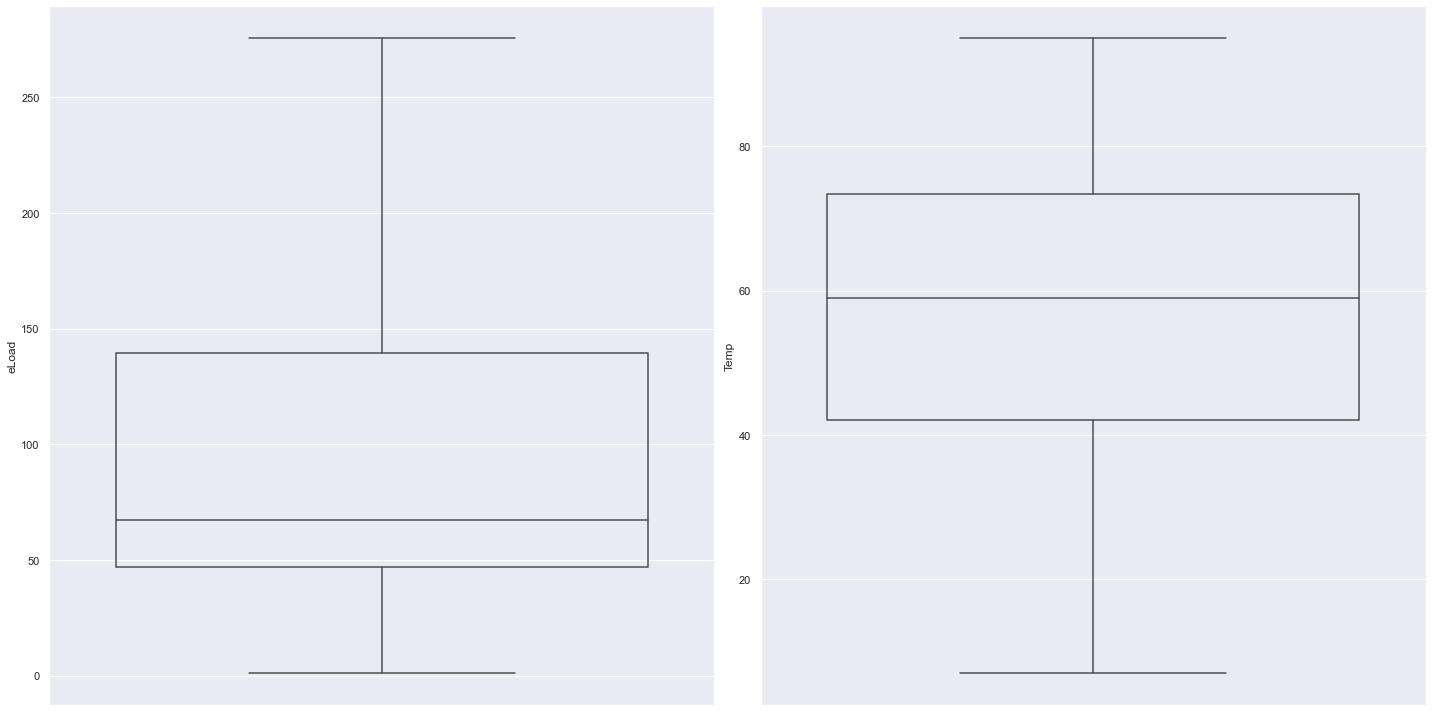


To check pairwise joint distribution of numeric data


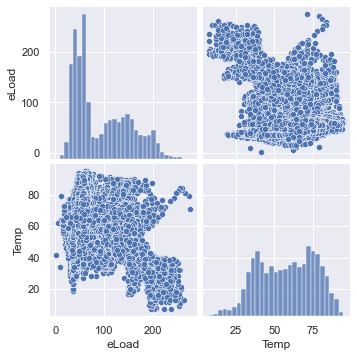


To check time series of numeric data  by daily, monthly and yearly frequency
Plotting daily data


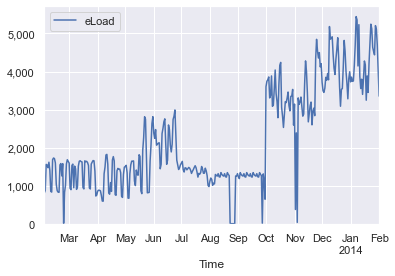

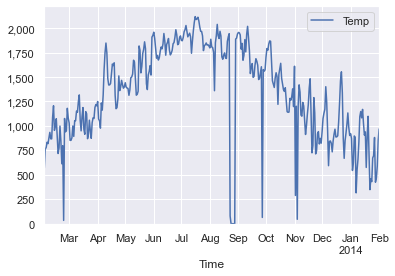

Plotting monthly data


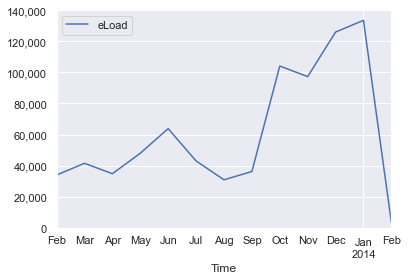

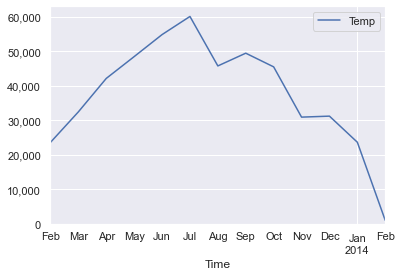

Plotting yearly data


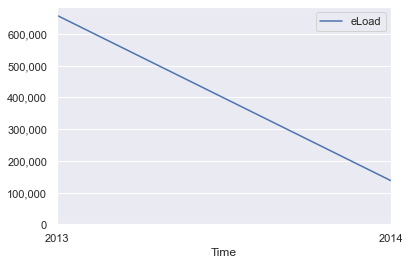

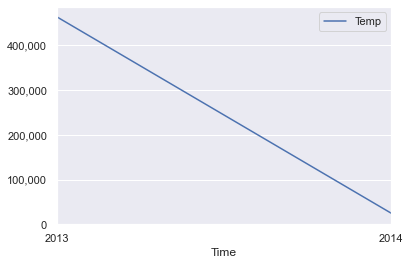

In [13]:
# EDA DEMO
eda(df_list[0])

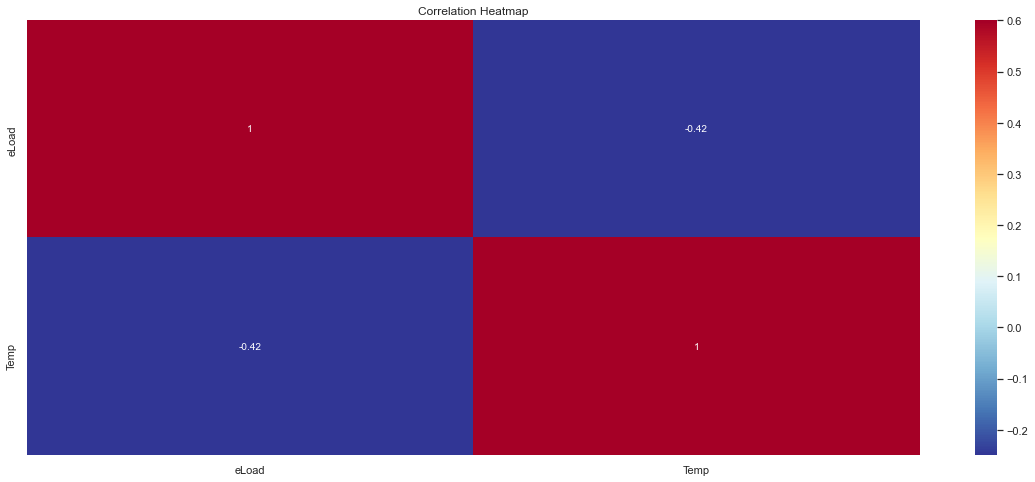

In [14]:
corr = df_list[0].corr()
plt.figure(figsize = (20, 8))

# Heatmap of correlations
sns.heatmap(corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

.00-.19 “very weak”
.20-.39 “weak”
.40-.59 “moderate”
.60-.79 “strong”
.80-1.0 “very strong”

## Mean Meter Reading by Hour and Day for entire dataset

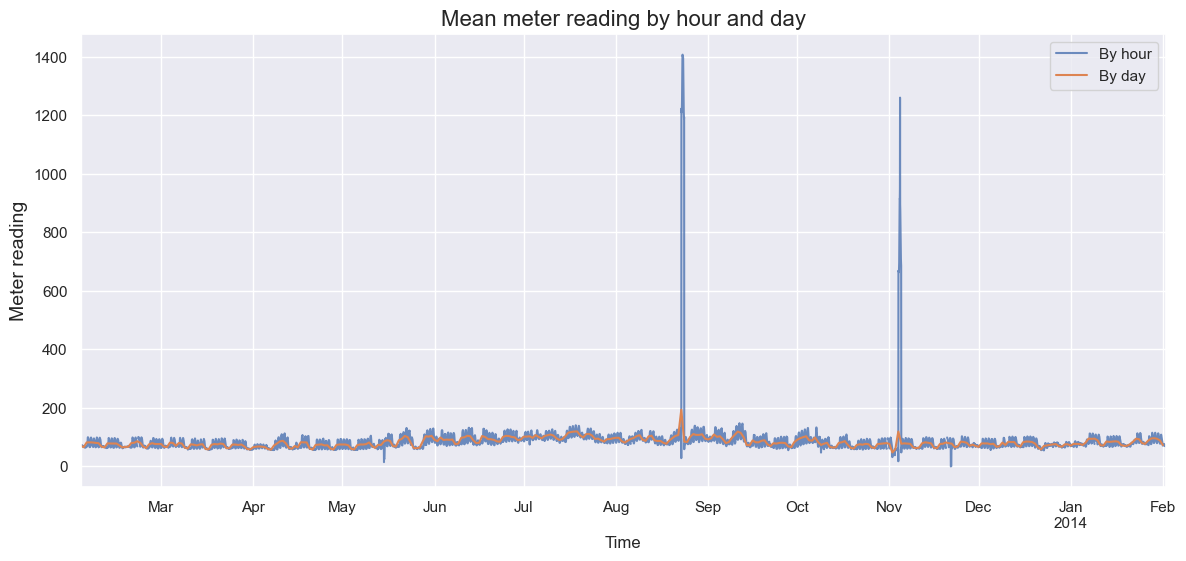

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(14, 6), dpi=100)
df_merged[['Time', 'eLoad']].set_index('Time').resample('H').mean()['eLoad'].plot(ax=axes, label='By hour', alpha=0.8).set_ylabel('Meter reading', fontsize=14);
df_merged[['Time', 'eLoad']].set_index('Time').resample('D').mean()['eLoad'].plot(ax=axes, label='By day', alpha=1).set_ylabel('Meter reading', fontsize=14);
axes.set_title('Mean meter reading by hour and day', fontsize=16);
axes.legend();

# EDA

##### Examine the Distribution of the Target Column

### Visualize Missing Data and Zeroes

In [ ]:
# generate an uncleaned version of df_merged
df0_list = [pd.read_csv(fp,skiprows=2).assign(Meterid=os.path.basename(fp)) for fp in files]
for i in range(len(df0_list)):
    df0_list[i].columns = ['Time', 'eLoad','Temp','Meterid']
    df0_list[i]["Time"] = pd.to_datetime(df0_list[i]["Time"], errors='coerce')
    df0_list[i]["eLoad"] = pd.to_numeric(df0_list[i]["eLoad"])

train = pd.concat(df0_list).set_index(['Time'])
train = train.fillna(0) 
train.info()

In [ ]:
train.eLoad = train.eLoad.astype(int)
train.Temp = train.Temp.astype(int)
train.head(5)

### Examine Missing Values
Number and percentage of missing values in each column

In [ ]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing__train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing__train_data.head(4)

In [ ]:
train['eLoad'].hist(figsize=(16, 8))

In [ ]:
def plot_dist_col(df, column):
    '''plot dist curves for train and test weather data for the given df column name'''
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.distplot(df[column].dropna(), color='green', ax=ax).set_title(column, fontsize=16)
    plt.xlabel(column, fontsize=15)
    plt.legend([column])
    plt.show()

In [ ]:
# choose your own dataframes and columns!
plot_dist_col(df_list[10], 'eLoad')

In [ ]:
# choose your own dataframes and columns!
plot_dist_col(df_merged, 'Temp')

### Simple Single Series Analysis

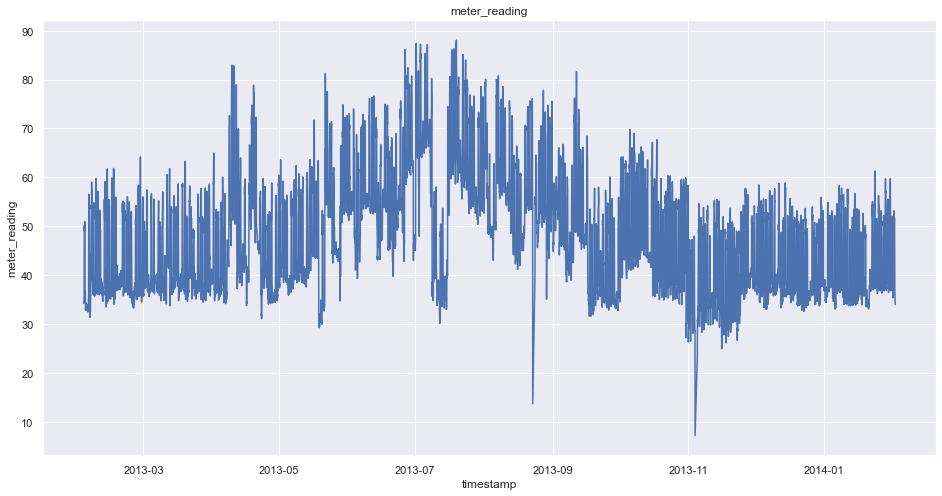

In [22]:
# choose your own dataframe

ts = df_list[10].groupby(["Time"])["eLoad"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('meter_reading')
plt.xlabel('timestamp')
plt.ylabel('meter_reading')
plt.plot(ts);

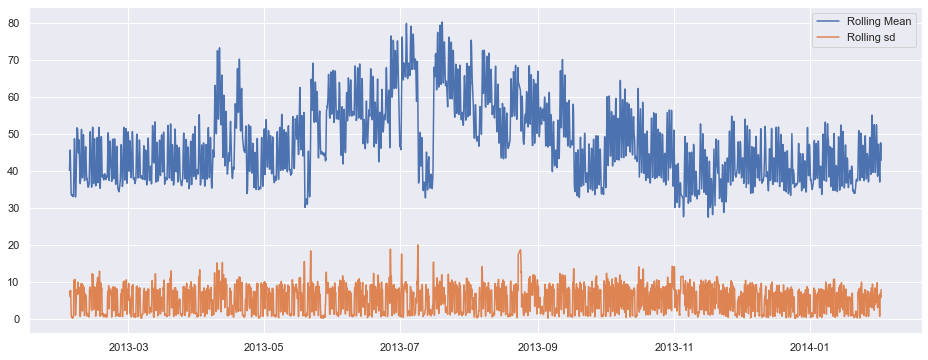

In [23]:
plt.figure(figsize=(16,6))
plt.plot(ts.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(ts.rolling(window=12,center=False).std(),label='Rolling sd');
plt.legend();

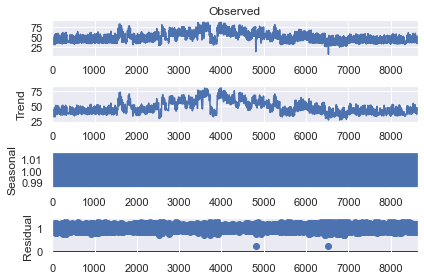

In [24]:
import statsmodels.api as sm

# Multiplicative
res = sm.tsa.seasonal_decompose(ts.values,freq=12, model="multiplicative")
fig = res.plot()

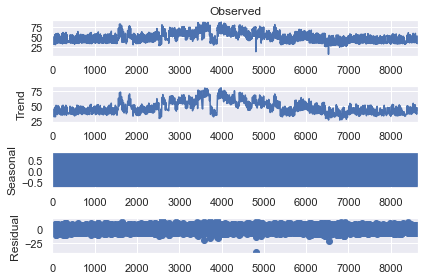

In [25]:
# Additive model
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="additive")
fig = res.plot()

## Time Series EDA Extension

In [26]:
"""
TODO: ensure all libraries are installed for the appropriate version of python
"""

from matplotlib.colors import LogNorm
%matplotlib inline

from scipy import stats
from scipy.interpolate import interp1d
!pip3 install pylatex # install pylatex package, if it was not installed before


In [27]:
# import nessesary function from pylatex 
from pylatex import Document, Section, Subsection, Command, Tabular,  Plot, Figure, SubFigure, NoEscape, Math  
from pylatex.utils import italic, bold 

In [28]:
# EDA information (print general EDA information or return it as a string, that will be used to generate pdf summary)
# the function declaration


def eda_general_information(df):

    """Given dataframe print general information about the data and dataframe. """

    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")

    print('General information about the dataset \n')
    print('Number of unique id: ', df['id'].nunique())
    print('Data parameters :')
    print(df.columns.values)
    print('\nTypes of data elements:')
    print(df.dtypes)
    print('\nInformation about the dataframe: ')
    print(df.info())
    print('\nDataframe: ')
    print(df.head())
    print()

    print("\nDistribution of numeric data")
    print(df.describe().T)

    # generate preview of entries with null values
    if len(df[df.isnull().any(axis=1)] != 0):
        print("\nPreview of data with null values:")
        print(df[df.isnull().any(axis=1)].head(3))

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")


def basic_info_str(df):

    """ Given dataframe saves basic eda information into string, return this string. """

    info = "1. The dataset contains following parameters: "
    for i, p in enumerate(df.columns.values):
        if i != 0:
            info += ', '
        info += str(p)
    info += ". \n\n"
    info += "2. The types of these parameters are "
    for i, d in enumerate(df.dtypes.values):
        if i != 0:
            info += ', '
        info += str(d)
    info += ". \n\n"

    info += "3. The number of unique id is " + str(df['id'].nunique()) + '. \n\n'

    if len(df[df.duplicated()]) > 0:
        info += "4. Number of duplicated entries is " + str(len(df[df.duplicated()])) + ".\n\n"
    else:
        info += "4. No duplicated entries found in dataset. \n\n" 

    return info

In [29]:
# Utilities that uses in several functions below 

def statistics(data):

    """Return mean and standard deviation of data in onedimentional array. """

    mean = sum(data) / len(data)
    std = sum([abs(data[i] - mean) for i in range(len(data))]) / len(data)
    return mean, std


def full_statistics(data):

    """Return mean and standard deviation, minimum and maximum of data in onedimentional array. """

    data = data[np.logical_not(np.isnan(data))]
    mean, std = statistics(data)
    return  [round(mean, 2), round(std, 2), round(min(data), 2), round(max(data), 2)]


In [30]:
# EDA plots 
# declaration of functions that plot time-series, distributions and histogram for numerical data in dataframe

def time_series_plot(df):

    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""

    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for col_num in df.select_dtypes(include=np.number).columns:
                __ = df.copy()
                __ = __.set_index(col)
                __T = __[[col_num]]

                parameter = __T.columns.values[0]
                if parameter == 'id':
                    continue

                labels = ['By day', 'By month']
                colors = ['deepskyblue','blue']

                fig, ax = plt.subplots(1, 1, figsize = (12, 6))
                for i, p in enumerate(['D' ,'M']):
                    t = __T.resample(p, closed = 'left', label = 'left').mean()
                    plt.plot(t, linewidth = 2, label = labels[i], color = colors[i], zorder = i+1)
                               
                ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                ax.set_ylabel(parameter, fontsize = 16, fontweight = 'bold')
                ax.set_xlabel('Time', fontsize = 16, fontweight = 'bold')

                plt.suptitle('Mean ' + parameter, fontsize = 20, fontweight = 'bold')
                ax.legend(fontsize = 14)
                ax.tick_params(axis='both', which='major', labelsize=10)

                fig.savefig(parameter + '.png', dpi = 300)
                plt.show()
                plt.close()


def plot_histograms(df, log = False, show_kde = False):

    """Given dataframe, plot histogram of numerical data distribution """

    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for col_num in df.select_dtypes(include=np.number).columns:
                __ = df.copy()
                __ = __.set_index(col)
                __T = __[[col_num]]

                name = parameter = __T.columns.values[0]
                if parameter == 'id':
                    continue

                t = __T.values[:, 0]
                t = t[np.logical_not(np.isnan(t))]

                fig, ax = plt.subplots(1, 1, figsize = (12, 6))
                if log == True:
                    name += '_log'
               
                if show_kde == True:
                    plt.hist(t, rwidth = 0.95, density = True, log = log, color = 'darkturquoise', alpha = 0.5)
                    kde = stats.gaussian_kde(t)
                    xx = np.linspace(min(t), max(t), 1000)
                    plt.plot(xx, kde(xx), color = 'tab:cyan', linewidth = 2)
                    name += '_kde'
                else:
                    plt.hist(t, rwidth = 0.95, density = True, log = log, color = 'darkturquoise')
                
                ax.set_ylabel('Frequency', fontsize = 16, fontweight = 'bold')
                ax.set_xlabel(parameter, fontsize = 16, fontweight = 'bold')

                plt.suptitle('Distribution of ' + parameter, fontsize = 20, fontweight = 'bold')
                ax.tick_params(axis='both', which='major', labelsize=12)

                fig.savefig(name + '_histogram.png', dpi = 300)
                plt.show()
                plt.close()


def plot_distribution_by_id(df, log = False, interpolate = False):
    
    """ Given dataframe, plot histogram of parameters distribution by id """

    if len(df.select_dtypes(include='datetime64').columns)>0:

        df2 = df.groupby('id').mean().reset_index()
        for col_num in df2.select_dtypes(include=np.number).columns:
            #for _ in range(1):

            __ = df2.copy()
            __T = __[[col_num]]
            __id = __[['id']]

            name = parameter = __T.columns.values[0]
            if parameter == 'id':
                continue

            t = __T.values[:, 0]
            id = __[['id']].values[:, 0]

            fig, ax = plt.subplots(1, 1, figsize = (12, 6))
            if log == True:
               name += '_log'
               
            if interpolate == True:
                plt.bar(id, t, color = 'violet', alpha = 0.5,  log = log)
                f = interp1d(id, t)
                xx = np.linspace(min(id), max(id), 1000)
                plt.plot(xx, f(xx), color = 'crimson', linewidth = 2)
                name += '_kde'
            else:
                plt.bar(id, t, color = 'crimson', log = log)

            ax.set_ylabel('Average ' + parameter, fontsize = 16, fontweight = 'bold')
            ax.set_xlabel('id', fontsize = 16, fontweight = 'bold')

            plt.suptitle('Distribution of average ' + parameter + ' by id ', fontsize = 20, fontweight = 'bold')
            ax.tick_params(axis='both', which='major', labelsize=12)

            fig.savefig(name + '_id_distribution.png', dpi = 300)
            plt.show()
            plt.close()
        
                
def plot_correlation_map(df):

    """Given the dataframe plot map of correlation between parameters. """

    corr = df.corr()
    labels = corr.columns.values
    corr = corr.values
    num = len(labels)

    # Heatmap of correlations
    fig, ax = plt.subplots(figsize = (6, 6))
    im = ax.imshow(corr, alpha = 0.5, cmap = 'gnuplot')

    ax.set_xticks(np.arange(num))
    ax.set_yticks(np.arange(num))
    ax.set_xticklabels(labels, fontsize = 16, fontweight = 'bold')
    ax.set_yticklabels(labels, fontsize = 16, fontweight = 'bold')

    for i in range(num):
        for j in range(num):
            text = ax.text(j, i, round(corr[i, j], 4), ha = 'center', va = 'center', color= 'black', fontsize = 16)

    fig.colorbar(im, ax = ax, orientation = 'vertical', shrink = 0.69)
    plt.title('Correlations Heatmap', fontsize = 16, fontweight = 'bold', pad = 10)
    fig.tight_layout() 

    fig.savefig('correlations.png', dpi = 300)
    plt.show()
    plt.close()

    
def range_box_plot(df):

    """Given dataframe, plot parameter range, mean and standard deviation. """

    columns = df.select_dtypes(include=np.number).columns
    L = len(columns)

    fig, axs = plt.subplots(1, L, figsize=(3*L, 5), sharey=False)
    for i, col in enumerate(columns):
        df2 = df.copy()
        data = df2[[col]] 
        parameter = data.columns.values[0]
        data = data.values[:, 0]
        data = data[np.logical_not(np.isnan(data))]
        mean, std = statistics(data)

        axs[i].bar(1, std, width = 0.5, bottom = mean-std, color = 'mediumturquoise', edgecolor = 'black', zorder = 2)
        axs[i].bar(1, std, width = 0.5, bottom = mean, color = 'mediumturquoise', edgecolor = 'black', zorder = 2)
        axs[i].errorbar(1, mean-std, yerr = [[mean-std-min(data)], [0]], capsize=40, linewidth = 2, color = 'black', zorder = 1)
        axs[i].errorbar(1, mean+std, yerr = [[0], [max(data)-mean-std]], capsize=40, linewidth = 2, color = 'black', zorder = 1)

        axs[i].set_ylabel(parameter, fontsize = 16, fontweight = 'bold')
        axs[i].axes.get_xaxis().set_visible(False)

    plt.tick_params(axis='both', which='major', labelsize=14)
    fig.tight_layout()
    
    fig.savefig('boxplots.png', dpi = 300)
    plt.show()
    plt.close()
    

def plot_joint_parameters_distribution(df):

    """ Description """

    columns = df.select_dtypes(include=np.number).columns
    L = len(columns)

    fig, axs = plt.subplots(L, L, figsize=(3*L, 3*L))
    for i, col1 in enumerate(columns):
        for j, col2 in enumerate(columns):
            _d1 = df[[col1]] 
            parameter1 = _d1.columns.values[0]
            _d2 = df[[col2]]
            parameter2 = _d2.columns.values[0]
            _d1 = _d1.values[:, 0]      
            d1 = _d1[np.logical_not(np.isnan(_d1))]

            if i < j:
                _d2 = _d2.values[:, 0]
                _d2 = _d2[np.logical_not(np.isnan(_d1))]
                d2 = _d2[np.logical_not(np.isnan(_d2))]
                d1 = d1[np.logical_not(np.isnan(_d2))]
             
                matrix = np.histogram2d(d1, d2, bins = 100, density = True)[0]
                matrix = matrix.T
                axs[j, i].imshow(matrix, norm = LogNorm(), cmap = 'plasma', interpolation = 'gaussian')

            if i==j:
                axs[j, i].hist(d1, rwidth = 0.9, bins = 20, density = True, color = 'rebeccapurple')
            if i > j:
                axs[j, i].axis('off')

            if i == 0:
                axs[j, i].set_ylabel(parameter2, fontsize = 14, fontweight = 'bold')
            else:
                axs[j, i].axes.get_yaxis().set_visible(False)
            if j == L-1:
                axs[j, i].set_xlabel(parameter1, fontsize = 14, fontweight = 'bold')
            else:
                axs[j, i].axes.get_xaxis().set_visible(False)

    plt.subplots_adjust(wspace = 0.1, hspace = 0.1)
    plt.suptitle('Distirubution of Numeric Parameters', fontsize = 16, fontweight = 'bold', y = 0.93)

    fig.savefig('joint_distribution.png', dpi = 300)
    plt.show()
    plt.close()


In [31]:
# Function that saves EDA information and plots to pdf file
# To run this function, first running of all plot-function is need 
# To generate pdf-file the script automatically calls MikTex. 
# MikTex is a free program that can be dowload from the link below form the official site
# https://miktex.org/download

def pdf_summary(df):
    
    parameters = df.select_dtypes(include=np.number).columns.values

    geometry_options = {"right": "2cm", "left": "2cm", "top": "2cm", "bottom" : "2cm"}
    doc = Document('summary', geometry_options=geometry_options)

    doc.preamble.append(Command('title', bold('Exploratory Data Analysis')))
    doc.append(NoEscape(r'\maketitle'))

    with doc.create(Section('Preliminary Data Processing')):
        doc.append(NoEscape(r'\vspace{0.5cm}'))
        doc.append(basic_info_str(df))

        with doc.create(Figure(position='h!')) as param_range:
            param_range.add_image('boxplots.png', width=NoEscape(r'\linewidth'))
            param_range.add_caption('Parameters ranges: the mean value plus and minus standard deviation are shown by boxes, minimal and maximal values -- by errorbars.')

        #doc.append("\n\n")

        doc.append(NoEscape(r'\pagebreak'))
        doc.append(NoEscape(r'\noindent'))
        doc.append(bold("General statistics of dataset parameters: "))
        doc.append("\n\n")

        with doc.create(Tabular(table_spec='|c|r|r|r|r|', data=None, pos='h!', row_height = 1.5)) as tab:
            tab.add_hline()
            tab.add_row (('Parameter', 'Mean', 'Standard deviation', 'Minimum', 'Maximum'), mapper = bold)
            tab.add_hline()
            for param in parameters:
                tab.add_hline()
                tab.add_row([param] + full_statistics(df[[param]].values[:, 0]))
            tab.add_hline()

        parameters = parameters[:-1]

        doc.append(NoEscape(r'\vspace{0.5cm}'))
        doc.append("\n\n")
        doc.append(NoEscape(r'\noindent'))
        doc.append(bold("Correlation between the data parameters: \n\n"))

        doc.append("The correlation is very weak if the correlation coefficient lie in the range 0 -- 0.19, weak:  0.20 - 0.39, moderate: 0.40-- 0.59, strong: 0.60 -- 0.79, very strong: 0.80 -- 1.0.")
        doc.append("\n")
        #doc.append(NoEscape(r'\vspace{0.5cm}'))
        
        with doc.create(Figure(position='h!')) as corr_plot:
            corr_plot.add_image('correlations.png', width=NoEscape(r'0.7\linewidth'))
            corr_plot.add_caption('Correlation between parameters (the id of data file is also considered). \
            The correlation coefficient of each paramaters pair is shown in the cell of these parsmeters junction.')

        
    doc.append(NoEscape(r'\pagebreak'))

    with doc.create(Section("Distribution of parameter's values")):
        with doc.create(Subsection('Time-series plots')):
            doc.append('The time-series plots demonstrates how parameters of dataset change with time.\
            These are avereged by one day and one month to show general dynamics of parameters .')
            doc.append(NoEscape(r'\vspace{0.5cm}'))

            series_plot_names = ['eload.png', 'Temp.png']
            with doc.create(Figure(position='h!')) as timeseries_plot: 
                for i, plot in enumerate(series_plot_names):
                    if i != 0:
                        doc.append("\n")
                        doc.append("\n")
                    with doc.create(SubFigure(position='b', width=NoEscape(r'1\linewidth'))) as temp:
                        temp.add_image(plot, width=NoEscape(r'\linewidth'))
                timeseries_plot.add_caption('Time-series paramters dependence on time, values sre averaged by day and by month.')

        doc.append(NoEscape(r'\pagebreak'))

        with doc.create(Subsection("The frequency of parameter's values")):
            doc.append('The histograms below shows how frequent are each given value of dataset parameters. ')
            doc.append(NoEscape(r'\vspace{0.5cm}'))

            def hist_names(param, log = False):
                if log == True:
                    return [param + '_log_histogram.png', param + '_log_kde_histogram.png']
                return [param + '_histogram.png', param + '_kde_histogram.png']

            histograms = [[], []]
            for i, param in enumerate(parameters):
                histograms[0] += hist_names(param, log = False)
                histograms[1] += hist_names(param, log = True)

            captions = ['Left panel: histograms of parameters distributions. Right panel: histograms with kernal\
            density estimation of parameter distribution density is shown by a solid line.', \
                'Same as Figure 3, but in logarithmic scale.']

            for j in range(2):
                with doc.create(Figure(position='h!')) as histogram_plot: 
                    for i, plot in enumerate(histograms[j]):
                        if i != 0 and i%2 == 0:
                            doc.append("\n")
                        with doc.create(SubFigure(position='b', width=NoEscape(r'0.5\linewidth'))) as temp:
                            temp.add_image(plot, width=NoEscape(r'\linewidth'))
                    histogram_plot.add_caption(captions[j])
                doc.append(NoEscape(r'\vspace{0.5cm}'))

        doc.append(NoEscape(r'\pagebreak'))

        with doc.create(Subsection("Parameters dependence on id")):
            doc.append('The following histograms demonstrates the average values of dataset parameters within one data file.  ')
            doc.append(NoEscape(r'\vspace{0.5cm}'))

            series_plot_names = [param + '_kde_id_distribution.png' for param in parameters]
            with doc.create(Figure(position='h!')) as timeseries_plot: 
                for i, plot in enumerate(series_plot_names):
                    if i != 0:
                        doc.append("\n")
                        doc.append(NoEscape(r'\vspace{0.7cm}'))
                    with doc.create(SubFigure(position='b', width=NoEscape(r'1\linewidth'))) as temp:
                        temp.add_image(plot, width=NoEscape(r'\linewidth'))
                timeseries_plot.add_caption('Parameters distribution by data file id, histogram and distribution density estimation shown by solid line.') 

    doc.append(NoEscape(r'\pagebreak'))

    with doc.create(Section("Joint data analysis")):
    
        with doc.create(Figure(position='h!')) as joint_plot:
            joint_plot.add_image('joint_distribution.png', width=NoEscape(r'\linewidth'))
            joint_plot.add_caption('Distribution of parameters. Histograms of each single parameter and joint distribution of each pair of parameters (the id of data file is also considered).')


    doc.generate_pdf(clean_tex=False, compiler='pdflatex')


In [32]:
# Processing data for peak prediction task

dataframes = []
for i in range(len(files)):
    dfi = pd.read_csv(files[i], skiprows=1).assign(Meterid = os.path.basename(files[i])) # read data from files
    dfi.dropna() # delete rows with NaN elements
    dfi.columns = ['Time', 'eLoad','Temp','Meterid']  # set column names
    dataframes.append(dfi)

df = pd.concat(dataframes) # merge dataframes for separete files 
df = df.assign(id=(df['Meterid']).astype('category').cat.codes) # set 'id' column with number of file(meterid) 

df['Time'] = pd.to_datetime(df['Time'],  errors='coerce') # Convert time column to the datetime format
df['eLoad'] = pd.to_numeric(df['eLoad']) # convert to numeric format
df['Temp'] = pd.to_numeric(df['Temp']) # convert to numeric format

In [21]:
# Run EDA function: display information about dataset

eda_general_information(df) 

NameError: name 'eda_general_information' is not defined

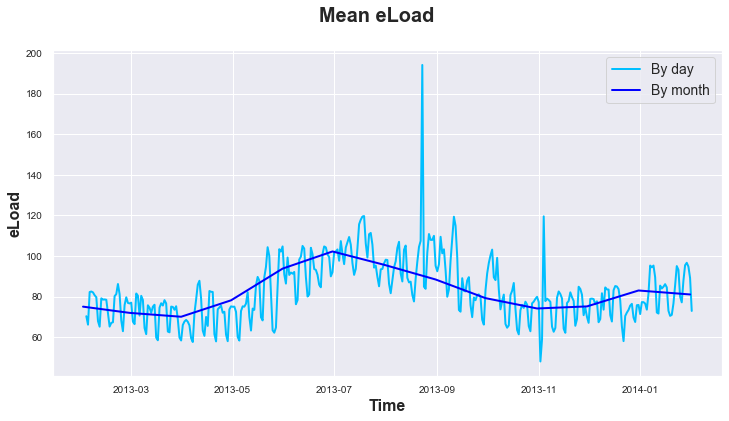

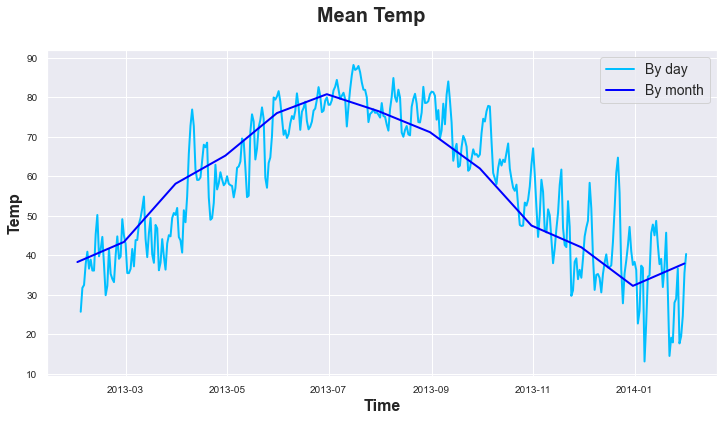

In [34]:
# Run EDA function that visialize data properties 

# 1. plot time series for each parameter
time_series_plot(df)

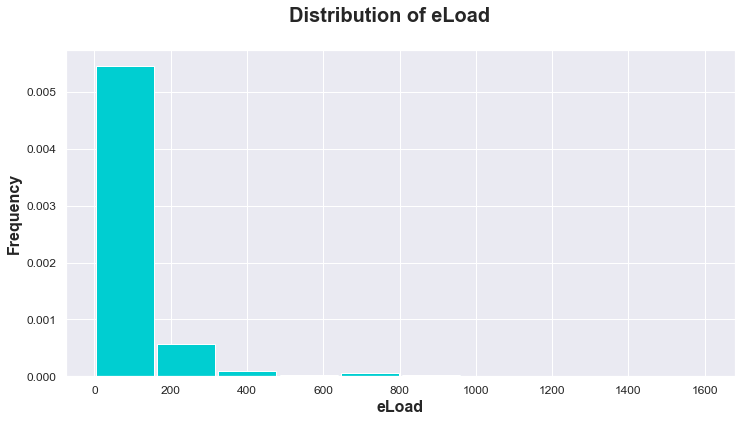

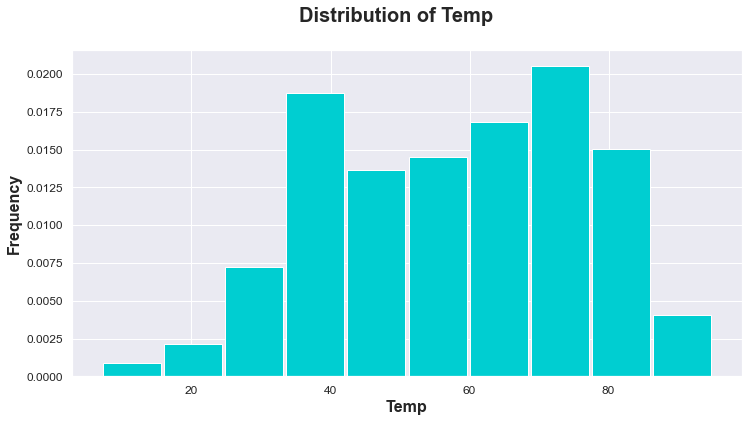

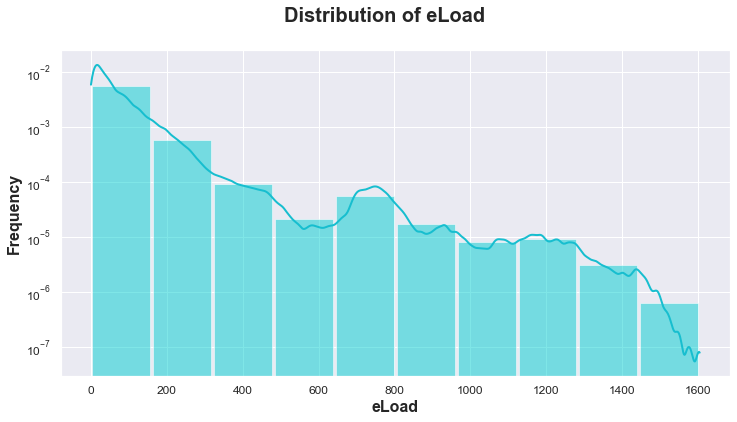

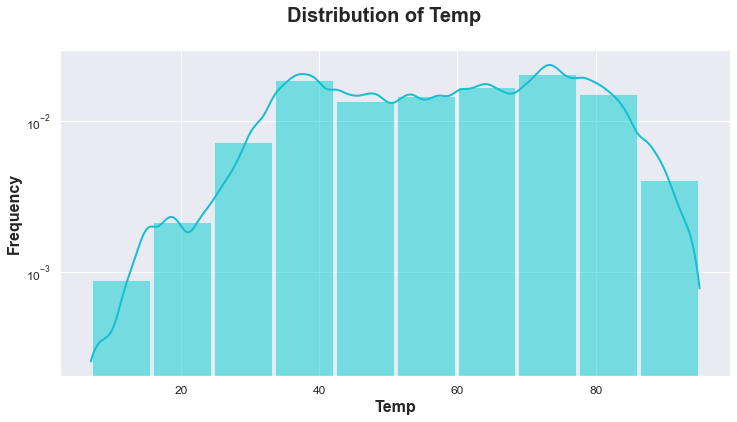

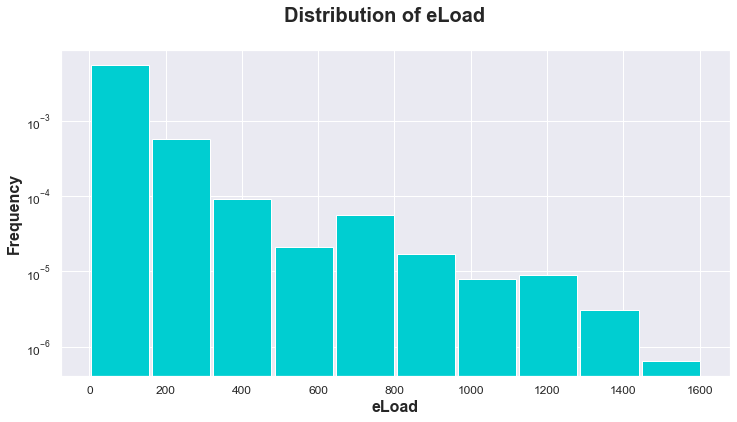

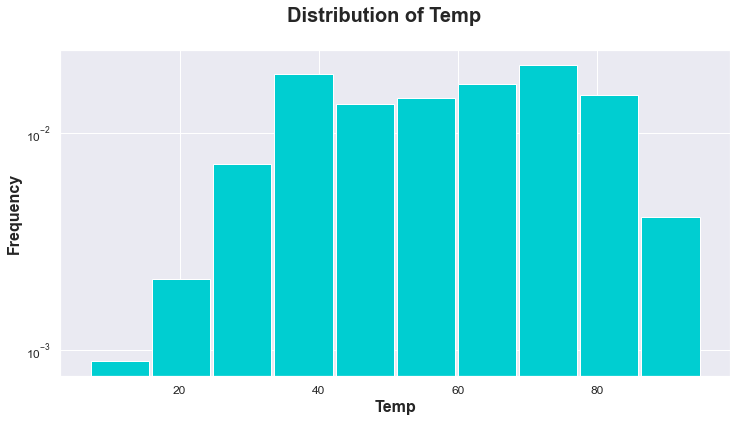

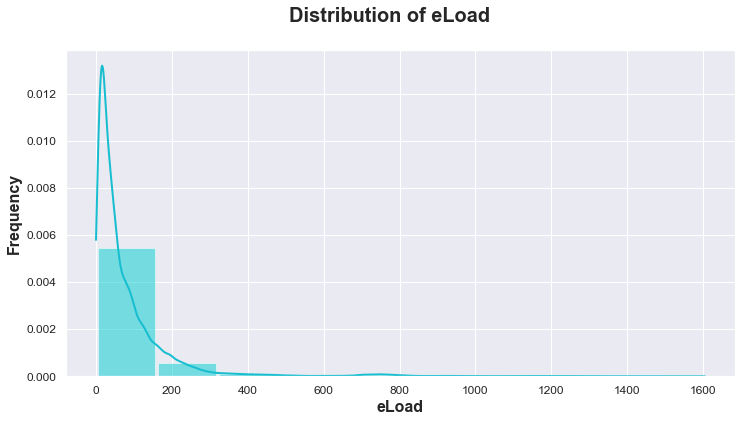

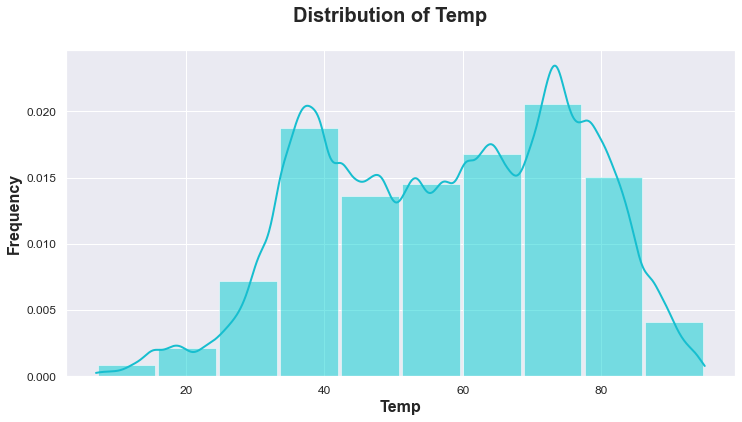

In [35]:
# 2. plot histograms of parameters distribution
plot_histograms(df, show_kde = False, log = False)
plot_histograms(df, show_kde = True, log = True)
plot_histograms(df, show_kde = False, log = True)
plot_histograms(df, show_kde = True, log = False)

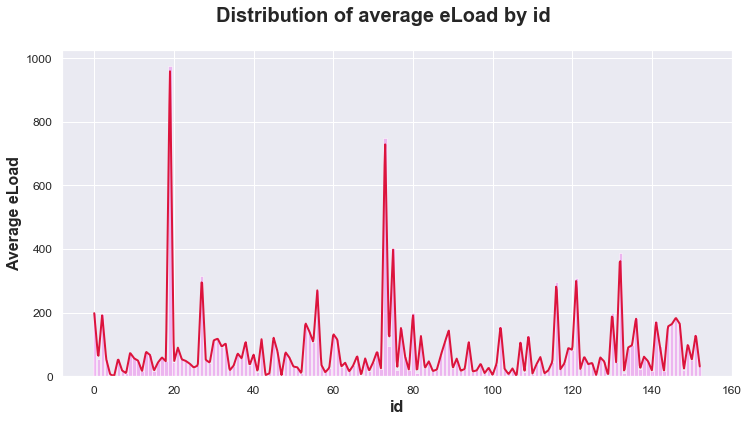

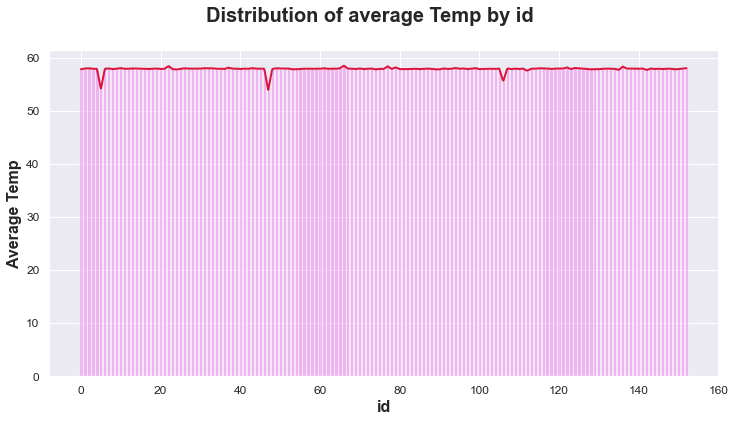

In [36]:
# 3. plot histogram of parameters distribution by id
plot_distribution_by_id(df, interpolate = True)

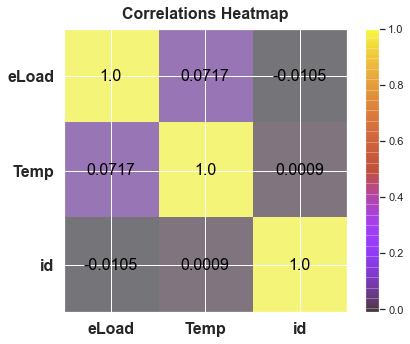

In [37]:
# 4. plot correlation coefficients between data parameters  
plot_correlation_map(df)

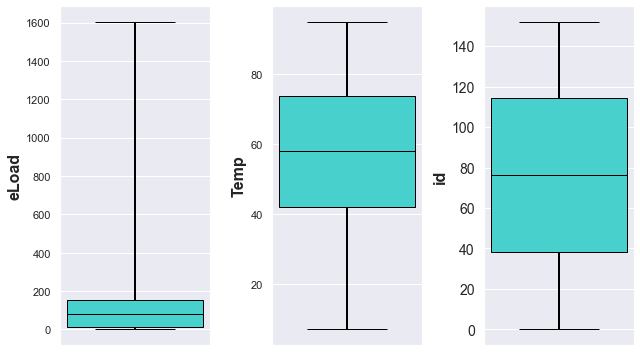

In [38]:
#5. plot parameters range (mean plus/minus standard deviation, minimum, maximum)
range_box_plot(df)

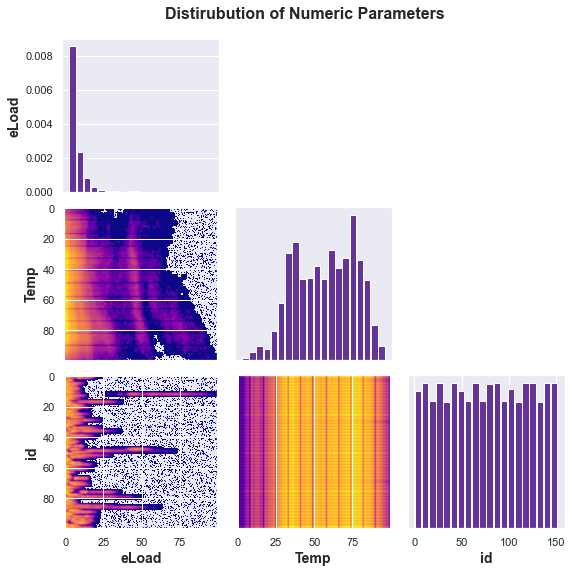

In [39]:
#6. plot joint distribution of all numeric parameters 
plot_joint_parameters_distribution(df)

Index(['Time', 'eLoad', 'Temp', 'Meterid'], dtype='object')

In [ ]:
fig, axes = plt.subplots(80,2,figsize=(25,50), dpi=80)
for i in range(df['id'].nunique()):
    df[df['id'] == i][['Time', 'eLoad']].set_index('Time').resample('H').mean()['eLoad'].plot(ax=axes[i//2][i%2],label='By hour', alpha=0.8, color='tab:blue',fontsize=4).set_ylabel('Mean meter reading', fontsize=4);
    df[df['id'] == i][['Time', 'eLoad']].set_index('Time').resample('D').mean()['eLoad'].plot(ax=axes[i//2][i%2],label='By day', alpha=1, color='tab:orange',fontsize=4).set_xlabel('');
    axes[i//2][i%2].legend();
    axes[i//2][i%2].set_title('site_id {}'.format(i), fontsize=8);
    plt.subplots_adjust(hspace=0.45)
    plt.tight_layout()

In [1]:
fig, axes = plt.subplots(80,2,figsize=(14,36), dpi=100)
for i in range(df['id'].nunique()):
    df[df['id'] == i][['time', 'eload']].set_index('time').plot(ax=axes[i//2][i%2], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Meter reading', fontsize=5);
    #df[df['id'] == i][['time', 'temp']].set_index('temp').plot(ax=axes[i%8][i//8], alpha=1, label='By day', color='tab:orange').set_xlabel('');
    axes[i//2][i%2].legend();
    axes[i//2][i%2].set_title('site_id {}'.format(i), fontsize=4);
    plt.subplots_adjust(hspace=0.45)

NameError: name 'plt' is not defined

In [ ]:
# create pdf summary
"""
TODO: make sure that MikTex is installed on your computer 
             ->   https://miktex.org/download
""" 

pdf_summary(df)